## Seaborn

In [1]:
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
tips = sns.load_dataset('tips')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


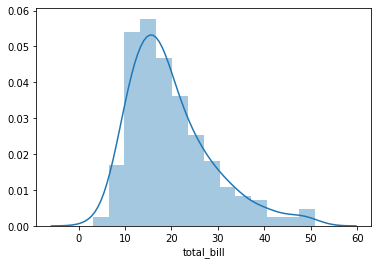

In [8]:
# dist plot --> univariate plot

sns.distplot(tips['total_bill'])

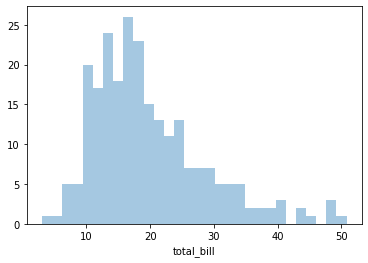

In [7]:
sns.distplot(tips['total_bill'], kde=False, bins=30)

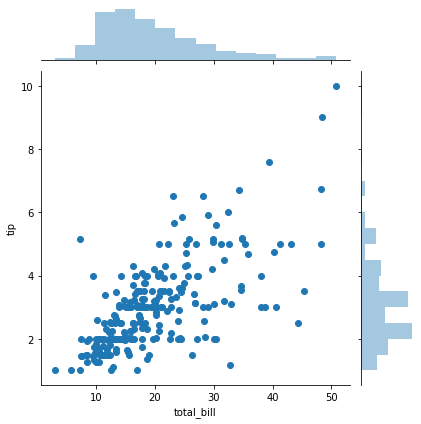

In [12]:
sns.jointplot(x='total_bill', y='tip', data=tips)

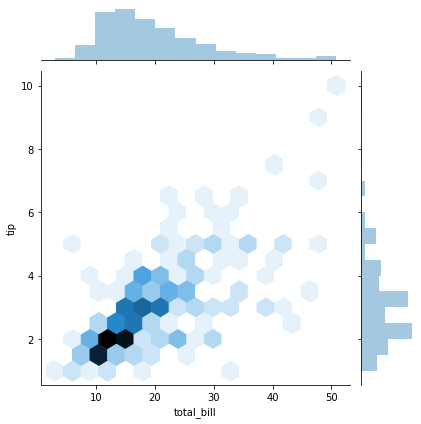

In [13]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')

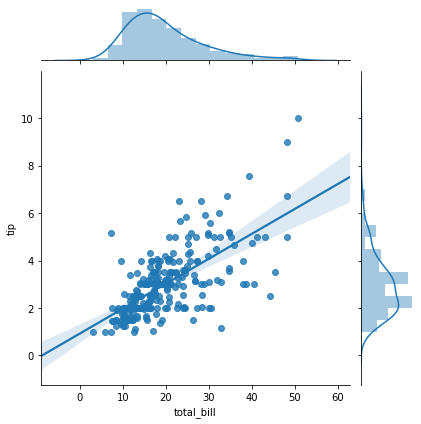

In [14]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg')

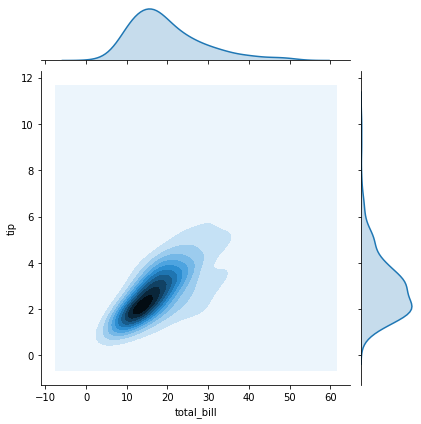

In [15]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='kde')

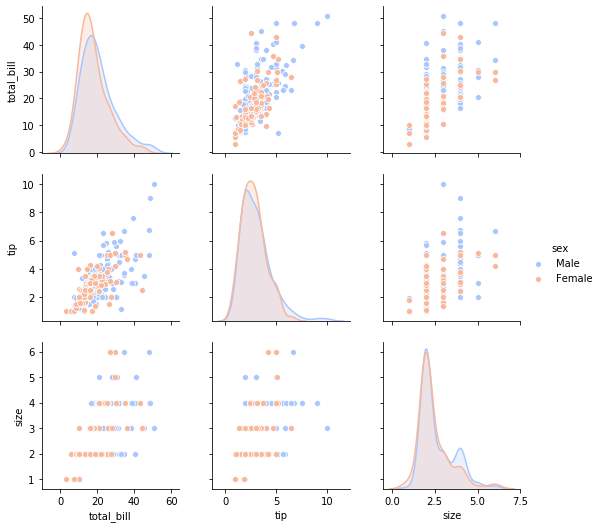

In [20]:
sns.pairplot(tips, hue='sex', palette='coolwarm')

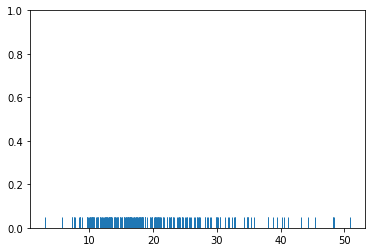

In [21]:
sns.rugplot(tips['total_bill'])

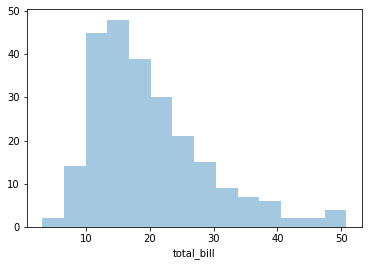

In [22]:
sns.distplot(tips['total_bill'], kde=False)

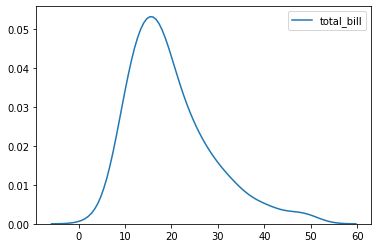

In [23]:
sns.kdeplot(tips['total_bill'])